**K-Means CLUSTERING!! - 360DIGITMG**

Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points. Clustering algorithms look for similarities or dissimilarities among data points so that similar ones can be grouped together.

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

    1. The centroids have stabilized — there is no change in their values because the clustering has been successful.
    2. The defined number of iterations has been achieved.

**K-Means Clustering Problem 4:**

Perform clustering analysis on the telecom data set. The data is a mixture of both categorical and numerical data. It consists of the number of customers who churn out. Derive insights and get possible information on factors that may affect the churn decision. Refer to Telco_customer_churn.xlsx dataset.

In [1]:
# As a first step towards your solution, we need to understand the data and hence we load the same and the libraries required
import pandas as pd               # for Data Manipulation
import matplotlib.pyplot as plt   # for Visualization
import numpy as np                #for Mathematical calculations
import seaborn as sns             #for Advanced visualizations

In [2]:
tele = pd.read_excel("Telco_customer_churn.xlsx")

In [3]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [4]:
# As a part of the Data cleansing we check the data for any missing/ na values
tele.isna().sum()

Customer ID                          0
Count                                0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [5]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
tele1 = tele.duplicated()
sum(tele1)

0

Looking at the data we note that we have most of the data in the form of category which needs to be changed to work on. 

Hence we do label encoding for the features to encode the labesl within the features

In [6]:
# Now we import the label encoder function from scikit learn
from sklearn.preprocessing import LabelEncoder

#creating instance of labelencoder
labelencoder=LabelEncoder()

x = tele.iloc[:, [3,6,7,9,10,11,13,14,15,16,17,18,19,20,21,22,23]]   # moving columns neede for encoding into x
x.isna().sum()       
y = tele.iloc[:, [0,1,2,4,5,8,12,24,25,26,27,28,29]]     # moving columns which are not needed for encoding into y


In [7]:
# We start creating labels for the categorical features for the ease of working on the data,
# in other words easier for the system or program to understand and interpret

x['Referred a Friend']=labelencoder.fit_transform(x['Referred a Friend'])
x['Offer']=labelencoder.fit_transform(x['Offer'])
x['Phone Service']=labelencoder.fit_transform(x['Phone Service'])
x['Multiple Lines']=labelencoder.fit_transform(x['Multiple Lines'])
x['Internet Service']=labelencoder.fit_transform(x['Internet Service'])
x['Internet Type']=labelencoder.fit_transform(x['Internet Type'])
x['Online Backup']=labelencoder.fit_transform(x['Online Backup'])
x['Online Security']=labelencoder.fit_transform(x['Online Security'])
x['Device Protection Plan']=labelencoder.fit_transform(x['Device Protection Plan'])
x['Premium Tech Support']=labelencoder.fit_transform(x['Premium Tech Support'])
x['Streaming TV']=labelencoder.fit_transform(x['Streaming TV'])
x['Streaming Movies']=labelencoder.fit_transform(x['Streaming Movies'])
x['Streaming Music']=labelencoder.fit_transform(x['Streaming Music'])
x['Unlimited Data']=labelencoder.fit_transform(x['Unlimited Data'])
x['Contract']=labelencoder.fit_transform(x['Contract'])
x['Paperless Billing']=labelencoder.fit_transform(x['Paperless Billing'])
x['Payment Method']=labelencoder.fit_transform(x['Payment Method'])

<ipython-input-7-6c4051583d0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Referred a Friend']=labelencoder.fit_transform(x['Referred a Friend'])
<ipython-input-7-6c4051583d0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Offer']=labelencoder.fit_transform(x['Offer'])
<ipython-input-7-6c4051583d0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [8]:
# label encode y ##
y = pd.DataFrame(y)

In [9]:
# concatenate x and y
tele_new=pd.concat([x,y],axis=1)
tele_new.columns
tele_new.isna().sum()
tele_new.describe()
tele_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int32  
 1   Offer                              7043 non-null   int32  
 2   Phone Service                      7043 non-null   int32  
 3   Multiple Lines                     7043 non-null   int32  
 4   Internet Service                   7043 non-null   int32  
 5   Internet Type                      7043 non-null   int32  
 6   Online Security                    7043 non-null   int32  
 7   Online Backup                      7043 non-null   int32  
 8   Device Protection Plan             7043 non-null   int32  
 9   Premium Tech Support               7043 non-null   int32  
 10  Streaming TV                       7043 non-null   int32  
 11  Streaming Movies                   7043 non-null   int32

The data is bound to have outliers, but depending on the data we know that not all outliers are to be treated. The data given might require the data for proper interpretation and hence we don't treat the outliers here.

**Univariate and Bivariate analysis**

(array([3821.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3222.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

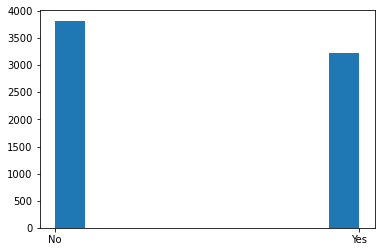

In [10]:
# Univariate and Bivariate analysis on the dataset
plt.hist(tele["Referred a Friend"])   #Univariate

(array([3877.,    0.,  805.,    0.,  602.,    0.,  415.,    0.,  824.,
         520.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

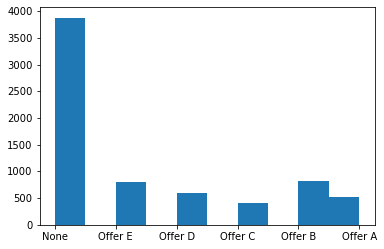

In [11]:
plt.hist(tele["Offer"])

(array([ 682.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6361.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

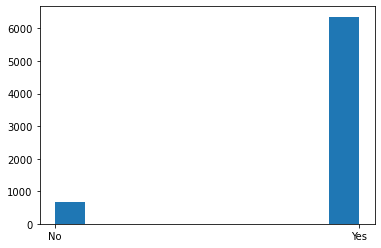

In [12]:
plt.hist(tele["Phone Service"])

(array([4072.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2971.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

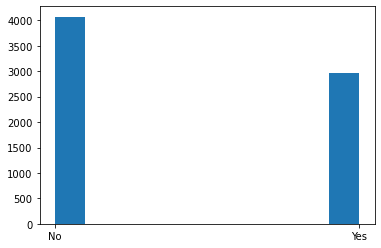

In [13]:
plt.hist(tele["Multiple Lines"])

(array([5517.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1526.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

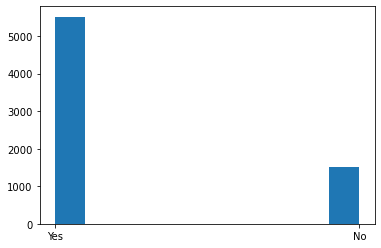

In [14]:
plt.hist(tele["Internet Service"])

(array([1652.,    0.,    0., 3035.,    0.,    0.,  830.,    0.,    0.,
        1526.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

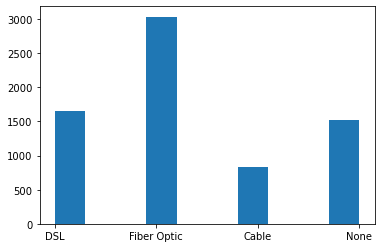

In [15]:
plt.hist(tele["Internet Type"])

(array([5024.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2019.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

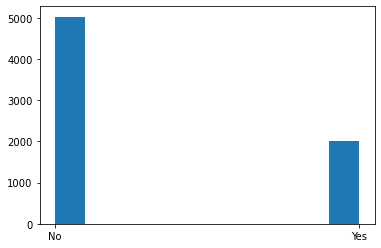

In [16]:
plt.hist(tele["Online Security"])

(array([4614.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2429.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

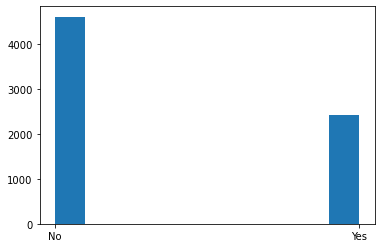

In [17]:
plt.hist(tele["Online Backup"])

(array([2422.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4621.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

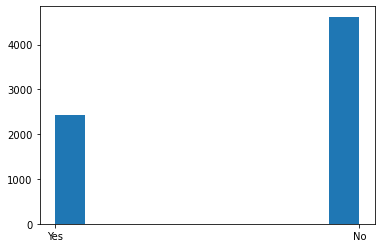

In [18]:
plt.hist(tele["Device Protection Plan"])

(array([4999.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2044.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

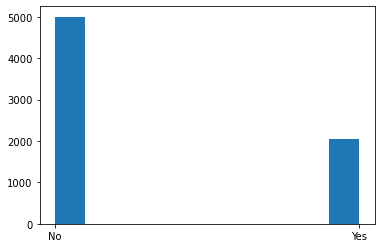

In [19]:
plt.hist(tele["Premium Tech Support"])

(array([4336.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2707.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

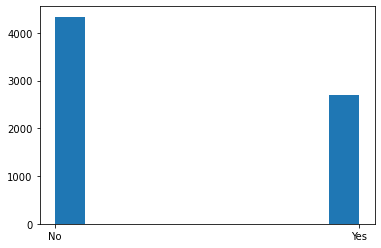

In [20]:
plt.hist(tele["Streaming TV"])

(array([2732.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4311.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

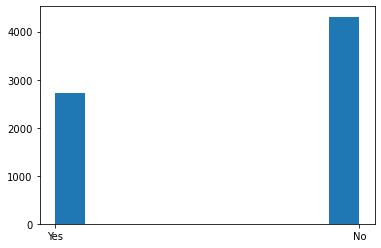

In [21]:
plt.hist(tele["Streaming Movies"])

(array([4555.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2488.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

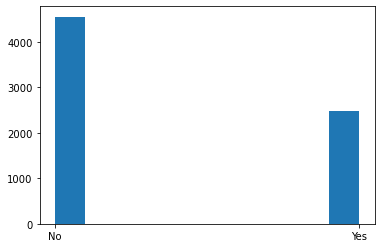

In [22]:
plt.hist(tele["Streaming Music"])

(array([2298.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4745.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

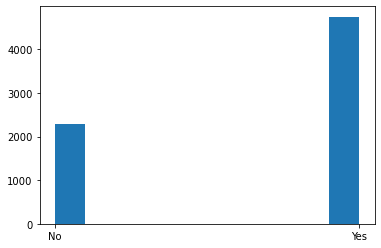

In [23]:
plt.hist(tele["Unlimited Data"])

(array([3610.,    0.,    0.,    0.,    0., 1550.,    0.,    0.,    0.,
        1883.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

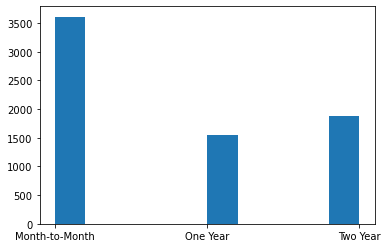

In [24]:
plt.hist(tele["Contract"])

(array([4171.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2872.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

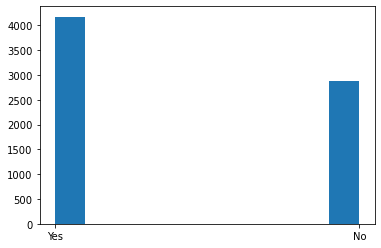

In [25]:
plt.hist(tele["Paperless Billing"])

(array([3909.,    0.,    0.,    0.,    0., 2749.,    0.,    0.,    0.,
         385.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

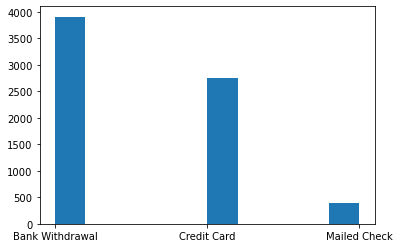

In [26]:
plt.hist(tele["Payment Method"])

(array([4907.,  236.,  255.,  236.,  264.,  221.,  248.,  213.,  238.,
         225.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

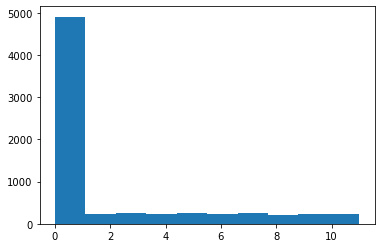

In [27]:
plt.hist(tele["Number of Referrals"])

(array([1724.,  746.,  561.,  538.,  473.,  444.,  452.,  495.,  501.,
        1109.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

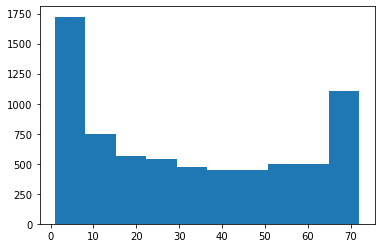

In [28]:
plt.hist(tele["Tenure in Months"])

(array([1211.,  657.,  646.,  665.,  601.,  659.,  660.,  659.,  647.,
         638.]),
 array([ 0.   ,  4.999,  9.998, 14.997, 19.996, 24.995, 29.994, 34.993,
        39.992, 44.991, 49.99 ]),
 <BarContainer object of 10 artists>)

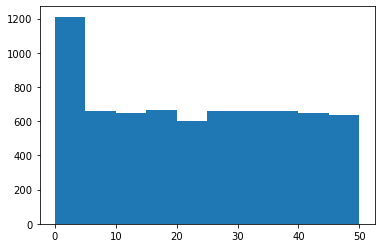

In [29]:
plt.hist(tele["Avg Monthly Long Distance Charges"])

(array([2365., 1118., 1490.,  868.,  113.,  141.,  586.,    0.,  271.,
          91.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <BarContainer object of 10 artists>)

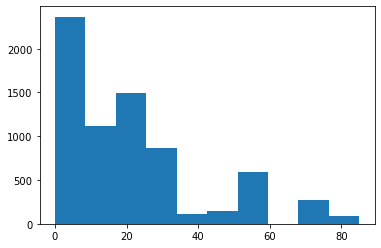

In [30]:
plt.hist(tele["Avg Monthly GB Download"])

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

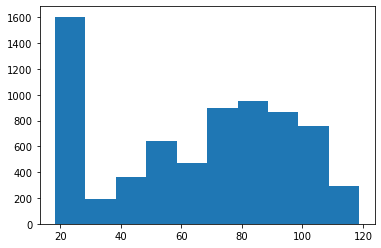

In [31]:
plt.hist(tele["Monthly Charge"])

(array([2720., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

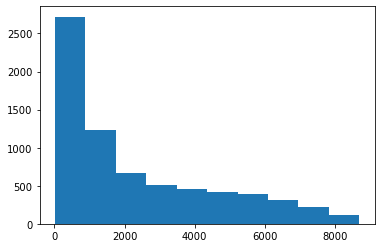

In [32]:
plt.hist(tele["Total Charges"])

(array([6558.,   40.,   48.,   68.,   50.,   61.,   47.,   54.,   49.,
          68.]),
 array([ 0.   ,  4.979,  9.958, 14.937, 19.916, 24.895, 29.874, 34.853,
        39.832, 44.811, 49.79 ]),
 <BarContainer object of 10 artists>)

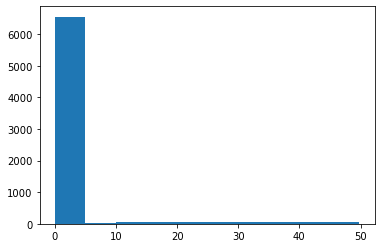

In [33]:
plt.hist(tele["Total Refunds"])

(array([6453.,   51.,  120.,   43.,   70.,   47.,   79.,   32.,   68.,
          80.]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]),
 <BarContainer object of 10 artists>)

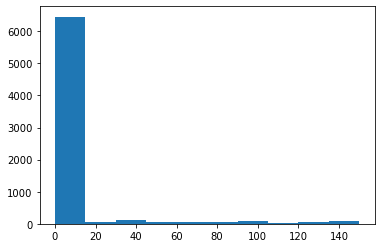

In [34]:
plt.hist(tele["Total Extra Data Charges"])

(array([3359., 1026.,  687.,  518.,  455.,  332.,  261.,  200.,  124.,
          81.]),
 array([   0.   ,  356.472,  712.944, 1069.416, 1425.888, 1782.36 ,
        2138.832, 2495.304, 2851.776, 3208.248, 3564.72 ]),
 <BarContainer object of 10 artists>)

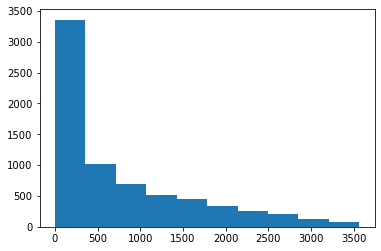

In [35]:
plt.hist(tele["Total Long Distance Charges"])

(array([2612., 1162.,  876.,  633.,  451.,  457.,  384.,  274.,  152.,
          42.]),
 array([   21.36 ,  1217.158,  2412.956,  3608.754,  4804.552,  6000.35 ,
         7196.148,  8391.946,  9587.744, 10783.542, 11979.34 ]),
 <BarContainer object of 10 artists>)

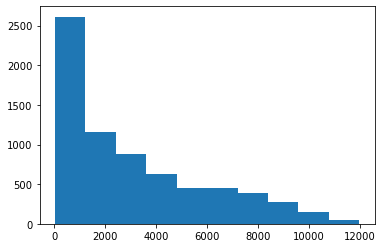

In [36]:
plt.hist(tele["Total Revenue"])

Text(0, 0.5, 'Total Revenue')

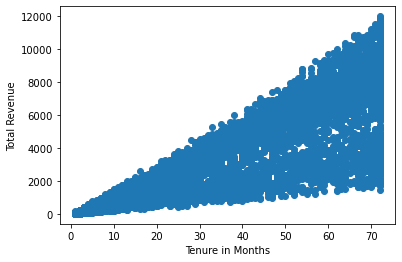

In [37]:
plt.scatter(tele["Tenure in Months"], tele["Total Revenue"]);plt.xlabel('Tenure in Months');plt.ylabel('Total Revenue')   #Bivariate

In [38]:
tele_new.skew(axis = 0, skipna = True)   #skewness

<ipython-input-38-0a4bec0deae6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tele_new.skew(axis = 0, skipna = True)   #skewness


Referred a Friend                    0.170753
Offer                                0.917537
Phone Service                       -2.727153
Multiple Lines                       0.316610
Internet Service                    -1.375769
Internet Type                       -0.366530
Online Security                      0.943722
Online Backup                        0.652817
Device Protection Plan               0.657450
Premium Tech Support                 0.924630
Streaming TV                         0.475581
Streaming Movies                     0.460199
Streaming Music                      0.614135
Unlimited Data                      -0.741196
Contract                             0.489779
Paperless Billing                   -0.375396
Payment Method                       0.762882
Count                                0.000000
Number of Referrals                  1.446060
Tenure in Months                     0.240543
Avg Monthly Long Distance Charges    0.049176
Avg Monthly GB Download           

In [39]:
tele_new.kurtosis(axis = 0, skipna = True)    #kurtosis

<ipython-input-39-b80cadc04469>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tele_new.kurtosis(axis = 0, skipna = True)    #kurtosis


Referred a Friend                    -1.971403
Offer                                -0.702730
Phone Service                         5.438908
Multiple Lines                       -1.900298
Internet Service                     -0.107291
Internet Type                        -0.684023
Online Security                      -1.109704
Online Backup                        -1.574277
Device Protection Plan               -1.568205
Premium Tech Support                 -1.145385
Streaming TV                         -1.774326
Streaming Movies                     -1.788725
Streaming Music                      -1.623300
Unlimited Data                       -1.451040
Contract                             -1.436907
Paperless Billing                    -1.859606
Payment Method                       -0.396717
Count                                 0.000000
Number of Referrals                   0.721964
Tenure in Months                     -1.387052
Avg Monthly Long Distance Charges    -1.254654
Avg Monthly G

In [40]:
tele_new.describe()

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.457476,1.397984,0.903166,0.421837,0.783331,1.746415,0.286668,0.344881,0.343888,0.290217,...,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.498224,1.828467,0.295752,0.493888,0.412004,0.926517,0.452237,0.475363,0.475038,0.453895,...,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.000000,5.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [41]:
tele_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int32  
 1   Offer                              7043 non-null   int32  
 2   Phone Service                      7043 non-null   int32  
 3   Multiple Lines                     7043 non-null   int32  
 4   Internet Service                   7043 non-null   int32  
 5   Internet Type                      7043 non-null   int32  
 6   Online Security                    7043 non-null   int32  
 7   Online Backup                      7043 non-null   int32  
 8   Device Protection Plan             7043 non-null   int32  
 9   Premium Tech Support               7043 non-null   int32  
 10  Streaming TV                       7043 non-null   int32  
 11  Streaming Movies                   7043 non-null   int32

In [42]:
tele_new = tele_new.drop(['Customer ID','Count','Quarter'], axis = 1)

In [43]:
tele_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   int32  
 1   Offer                              7043 non-null   int32  
 2   Phone Service                      7043 non-null   int32  
 3   Multiple Lines                     7043 non-null   int32  
 4   Internet Service                   7043 non-null   int32  
 5   Internet Type                      7043 non-null   int32  
 6   Online Security                    7043 non-null   int32  
 7   Online Backup                      7043 non-null   int32  
 8   Device Protection Plan             7043 non-null   int32  
 9   Premium Tech Support               7043 non-null   int32  
 10  Streaming TV                       7043 non-null   int32  
 11  Streaming Movies                   7043 non-null   int32

In [44]:
# Since the data is with different scales we Normalize the same by defining and running the Norm function
def norm(i):
    x = (i - i.min())/(i.max() - i.min())
    return x

df_norm = norm(tele_new.iloc[:,:])
df_norm.head()

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.000000,0.094118,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202
1,1.0,1.0,1.0,1.0,1.0,0.666667,0.0,1.0,0.0,0.0,...,0.090909,0.098592,0.977195,0.200000,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855
2,0.0,0.8,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,...,0.000000,0.239437,0.226645,0.611765,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013
3,1.0,0.6,1.0,0.0,1.0,0.666667,0.0,1.0,1.0,0.0,...,0.090909,0.338028,0.395279,0.141176,0.798507,0.287988,0.269733,0.000000,0.138580,0.248680
4,1.0,0.6,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,...,0.090909,0.507042,0.126625,0.164706,0.579602,0.328796,0.000000,0.000000,0.065702,0.257652


After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

    1. Centroids of newly formed clusters do not change
    2. Points remain in the same cluster
    3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot. 

In [45]:
# calculating TWSS - Total within SS using different cluster range
from sklearn.cluster import KMeans

TWSS = []
k = list(range(2, 8))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[22112.96089083438,
 19182.46386987886,
 17819.847641015913,
 16925.365301793918,
 16397.208473540977,
 15932.955759906386]

Text(0, 0.5, 'total_within_SS')

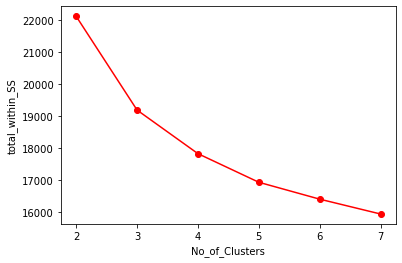

In [48]:
# Plotting the Scree plot using the TWSS from above defined function
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [49]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(df_norm)


KMeans(n_clusters=3)

In [50]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
df_norm['clust'] = mb # creating a  new column and assigning it to new column 

In [51]:
df_norm.head()

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clust
0,0.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.094118,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202,1
1,1.0,1.0,1.0,1.0,1.0,0.666667,0.0,1.0,0.0,0.0,...,0.098592,0.977195,0.200000,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855,1
2,0.0,0.8,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,...,0.239437,0.226645,0.611765,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013,1
3,1.0,0.6,1.0,0.0,1.0,0.666667,0.0,1.0,1.0,0.0,...,0.338028,0.395279,0.141176,0.798507,0.287988,0.269733,0.000000,0.138580,0.248680,0
4,1.0,0.6,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,...,0.507042,0.126625,0.164706,0.579602,0.328796,0.000000,0.000000,0.065702,0.257652,1


In [55]:
# We can clearly see that we have the labels in the dataset in the form of a column called "clust", symbolizing the clusters
# In order to see the clusters we aggregate the records within the clusters and group them by the clusters to visualize the 
# 3 nos of clear cluster formed
df_norm.iloc[:, 0:53].groupby(df_norm.clust).mean()

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clust
clust,,,,,,,,,,,,,,,,,,,,,
0,0.661879,0.177267,0.923266,0.682807,1.000000,0.494871,0.512515,0.654493,0.718096,0.56668,...,0.714230,0.481988,0.321142,0.720365,0.539475,0.045981,0.067816,0.345510,0.494402,0.0
1,0.296031,0.357580,0.838972,0.313273,1.000000,0.443830,0.249512,0.271308,0.218282,0.21568,...,0.238552,0.421089,0.297952,0.474274,0.132588,0.037349,0.049816,0.099734,0.126074,1.0
2,0.456266,0.285901,1.000000,0.224543,0.003916,0.998477,0.001958,0.000000,0.000653,0.00000,...,0.417488,0.499748,0.000883,0.030074,0.075554,0.033088,0.002437,0.216347,0.118927,2.0


We see that the three cluster were formed and the classification could be inferred as follows:

Cluster 1 = These are the customers that are frequent users and take up the offers as well, Internet used by them is moderate to heavy, but take on offers as well. The revenue earned through these is also the best. Hence, these are the customers that are least likely to churn.

Cluster 2 = These are the customers that are least on all the criterias whether being using the services, to net usage, and dont take up the offers as well, additionally the revenue earned through them is the least. Hence we infer that these are the ones that churn the most.

Cluster 3 = These are the customers that stand in the middle of the two extremes and may or may not churn that frequently.